# Part 1:Data Exploration

## Importing libraries

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Importing Data

In [66]:
#importing data
#df = pd.read_csv('Combined_LCA_Disclosure_Data_FY2020_to_FY2024.csv', low_memory=False)
df2020 = pd.read_csv('Combined_LCA_Disclosure_Data_FY2020.csv', low_memory=False)
df2021 = pd.read_csv('Combined_LCA_Disclosure_Data_FY2021.csv', low_memory=False)
df2022 = pd.read_csv('Combined_LCA_Disclosure_Data_FY2022.csv', low_memory=False)
df2023 = pd.read_csv('Combined_LCA_Disclosure_Data_FY2023.csv', low_memory=False)
df2024 = pd.read_csv('Combined_LCA_Disclosure_Data_FY2024.csv', low_memory=False)
all_data = [df2020, df2021,df2022,df2023,df2024]

df = pd.concat(all_data)
df.head(5)

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,APPENDIX_A_ATTACHED,PUBLIC_DISCLOSURE,PREPARER_LAST_NAME,PREPARER_FIRST_NAME,PREPARER_MIDDLE_INITIAL,PREPARER_BUSINESS_NAME,PREPARER_EMAIL
0,I-200-19268-393467,Certified,2019-09-25,2019-10-01,NaN,H-1B,"APPLICATION ENGINEER, OMS [15-1199.02]",15-1199,"COMPUTER OCCUPATIONS, ALL OTHER",Y,...,N,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
1,I-200-19268-638983,Certified,2019-09-25,2019-10-01,NaN,H-1B,BI DEVELOPER II,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",Y,...,N,Y,BOTH,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
2,I-200-19268-177184,Certified,2019-09-25,2019-10-01,NaN,H-1B,QUALITY ENGINEER,17-2141,MECHANICAL ENGINEERS,Y,...,N,Y,BOTH,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
3,I-200-19268-936403,Certified,2019-09-25,2019-10-01,NaN,H-1B,"SOFTWARE DEVELOPER, APPLICATIONS",15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",Y,...,N,Y,BOTH,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
4,I-200-19268-394079,Certified,2019-09-25,2019-10-01,NaN,H-1B,QUALITY ENGINEER LEVEL II,15-1199,"COMPUTER OCCUPATIONS, ALL OTHER",Y,...,N,Y,BOTH,NaN,Disclose Business,NaN,NaN,NaN,NaN,LEGAL@THEEGIANTS.COM


In [67]:
# Delete previous dataframes to free memory
del df2020, df2021, df2022, df2023, df2024, all_data

## Basic Data Information 

### Overview

In [68]:
#overview
df.describe()

,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,EMPLOYER_PHONE_EXT,NAICS_CODE,EMPLOYER_POC_PHONE_EXT,AGENT_ATTORNEY_PHONE,AGENT_ATTORNEY_PHONE_EXT,WORKSITE_WORKERS,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,PREVAILING_WAGE,PW_OTHER_YEAR,TOTAL_WORKSITE_LOCATIONS
count,3.564698e+06,3.564698e+06,3.564698e+06,3.564698e+06,3.564698e+06,3.564698e+06,3.564698e+06,2.163120e+05,3.564698e+06,2.153180e+05,2.584638e+06,1.691640e+05,3.551363e+06,3.564696e+06,1.167714e+06,3.562736e+06,220746.000000,3.551365e+06
mean,1.762165e+00,6.351761e-01,3.715257e-01,1.485913e-01,1.008949e-02,3.040381e-01,2.996994e-01,5.401010e+02,4.248195e+05,7.693272e+02,1.521254e+10,9.605332e+02,1.761110e+00,1.121646e+05,1.443967e+05,9.622957e+04,2021.199918,1.451180e+00
std,5.898817e+00,3.915777e+00,2.468180e+00,1.311127e+00,7.237273e-01,1.626940e+00,1.490564e+00,1.535733e+04,2.086486e+05,1.916066e+04,5.798979e+10,5.955874e+03,5.891472e+00,6.508975e+05,9.259075e+06,4.204133e+04,1.739751,7.184328e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.710210e+05,0.000000e+00,1.032959e+09,0.000000e+00,1.000000e+00,7.250000e+00,7.500000e+00,7.250000e+00,1990.000000,1.000000e+00
25%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.344130e+05,0.000000e+00,1.305665e+10,2.700000e+01,1.000000e+00,8.077900e+04,9.740000e+04,7.444300e+04,2020.000000,1.000000e+00
50%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.415110e+05,1.000000e+00,1.469291e+10,1.110000e+02,1.000000e+00,1.047490e+05,1.253280e+05,9.439000e+04,2021.000000,1.000000e+00
75%,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.760000e+02,5.415120e+05,3.600000e+02,1.703678e+10,2.300000e+02,1.000000e+00,1.390000e+05,1.653000e+05,1.191220e+05,2023.000000,2.000000e+00
max,1.098000e+03,1.098000e+03,1.098000e+03,1.098000e+03,1.098000e+03,1.098000e+03,1.098000e+03,7.002824e+06,5.698555e+06,7.002824e+06,8.282103e+13,2.108820e+06,1.098000e+03,1.204781e+09,1.000000e+10,8.108500e+05,2024.000000,1.000000e+01


### Checking for Missing Values

In [69]:
#checking for missing value
df.isnull()

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,APPENDIX_A_ATTACHED,PUBLIC_DISCLOSURE,PREPARER_LAST_NAME,PREPARER_FIRST_NAME,PREPARER_MIDDLE_INITIAL,PREPARER_BUSINESS_NAME,PREPARER_EMAIL
0,False,False,False,False,True,False,False,False,False,False,...,False,True,True,True,False,True,True,True,True,True
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,True,True,True,True
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,True,True,True,True
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,True,True,True,True
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890363,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,False,False,False,True,False,False
890364,False,False,False,False,True,False,False,False,False,False,...,False,True,True,True,False,False,False,True,False,False
890365,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,True,True,True,True
890366,False,False,False,False,True,False,False,False,False,False,...,False,True,True,True,False,False,False,True,False,False


### Data Types of Each Colulmn

In [70]:
#Information regarding data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3564698 entries, 0 to 890367
Data columns (total 96 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   CASE_NUMBER                     object 
 1   CASE_STATUS                     object 
 2   RECEIVED_DATE                   object 
 3   DECISION_DATE                   object 
 4   ORIGINAL_CERT_DATE              object 
 5   VISA_CLASS                      object 
 6   JOB_TITLE                       object 
 7   SOC_CODE                        object 
 8   SOC_TITLE                       object 
 9   FULL_TIME_POSITION              object 
 10  BEGIN_DATE                      object 
 11  END_DATE                        object 
 12  TOTAL_WORKER_POSITIONS          int64  
 13  NEW_EMPLOYMENT                  int64  
 14  CONTINUED_EMPLOYMENT            int64  
 15  CHANGE_PREVIOUS_EMPLOYMENT      int64  
 16  NEW_CONCURRENT_EMPLOYMENT       int64  
 17  CHANGE_EMPLOYER                 i

## Visual Data Exploration

### 1. Total Number of Applications Over the Years 

In [71]:
# Total number of applications over the years (2020-2024)
df['YEAR'] = pd.to_datetime(df['DECISION_DATE']).dt.year  # Extract year from decision date
yearly_applications = df['YEAR'].value_counts().sort_index()
print(yearly_applications) #Checking Values

YEAR
2019    112017
2020    704831
2021    707097
2022    702514
2023    749844
2024    588395
Name: count, dtype: int64


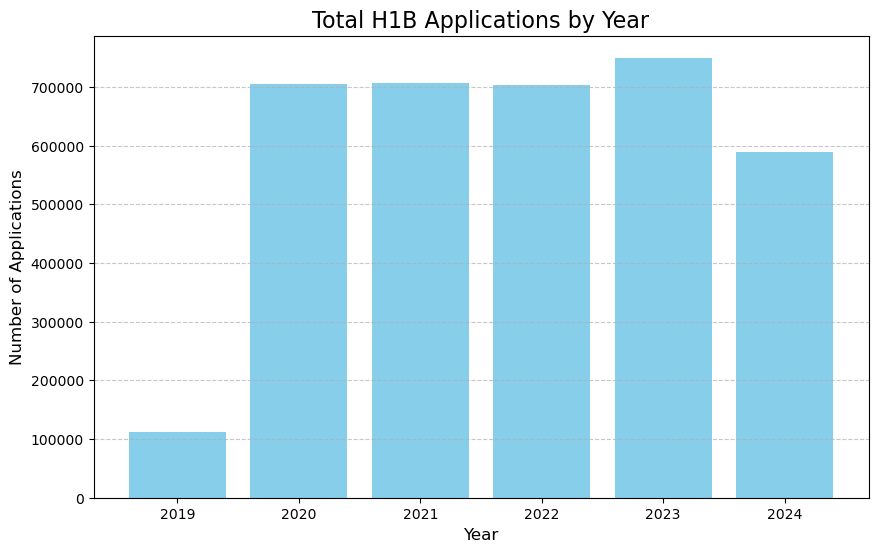

In [72]:
#plot
plt.figure(figsize=(10, 6))
plt.bar(yearly_applications.index, yearly_applications.values, color='skyblue')
plt.title('Total H1B Applications by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Applications', fontsize=12)
plt.xticks(yearly_applications.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 2. Distribution of Case Statuses

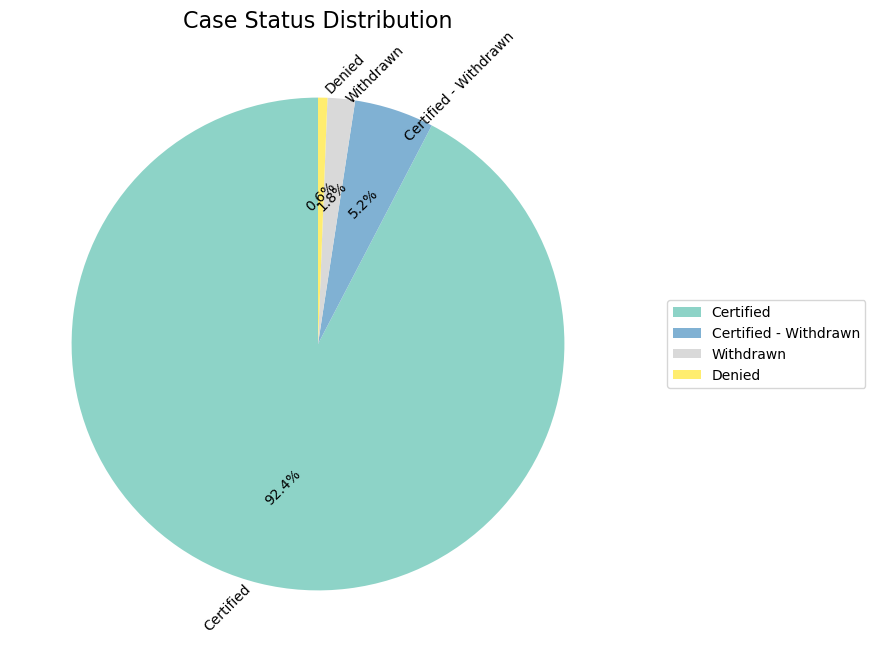

In [73]:
# Distribution of case statuses
case_status_counts = df['CASE_STATUS'].value_counts()

# Case status distribution using pie chart
plt.figure(figsize=(8, 8))
case_status_counts.plot(kind='pie', startangle=90, cmap='Set3',autopct='%1.1f%%', textprops={'rotation':45},legend=True)
plt.title('Case Status Distribution', fontsize=16)
plt.ylabel('')  # Remove y-label for better appearance
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))
plt.show()

### 3. Top 10 Occupations in H1B Applications

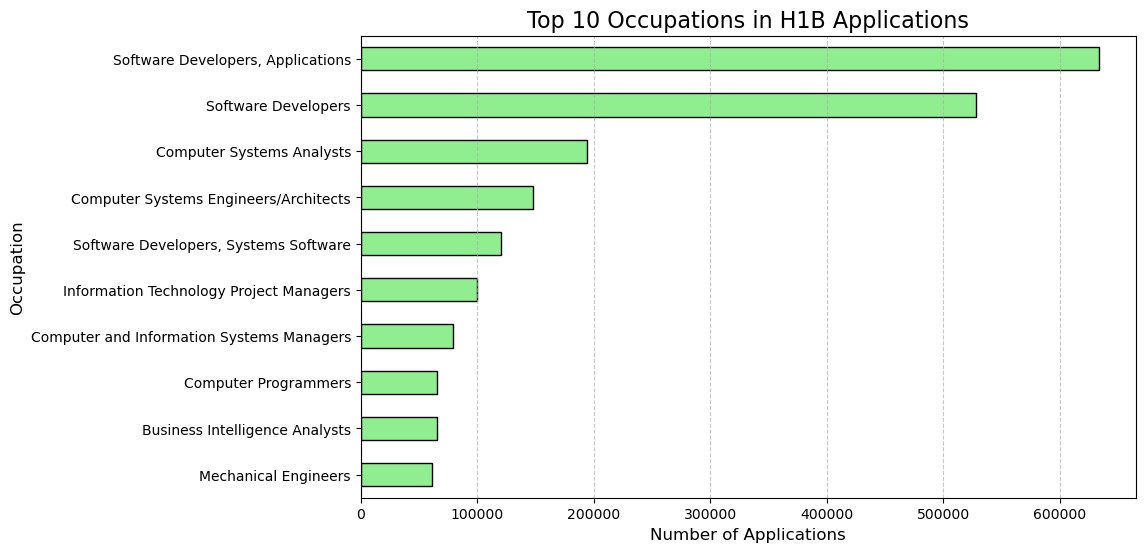

In [74]:
# Top occupations in the dataset
top_occupations = df['SOC_TITLE'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_occupations.plot(kind='barh', color='lightgreen', edgecolor='black')
plt.title('Top 10 Occupations in H1B Applications', fontsize=16)
plt.xlabel('Number of Applications', fontsize=12)
plt.ylabel('Occupation', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### 4. Salary Analysis

In [75]:
#Salary Analysis
#Clean and convert salaries to numeric, handling outliers

unique_units = df['PW_UNIT_OF_PAY'].unique()
print(unique_units)

['Year' 'Hour' 'Bi-Weekly' nan 'Month' 'Week']


In [76]:

df['PREVAILING_WAGE'] = pd.to_numeric(df['PREVAILING_WAGE'], errors='coerce')
df = df[df['PREVAILING_WAGE'] > 0]  # Filter out non-positive values

conversion_factors = {
    'Year': 1,            # No Normalization
    'Month': 12,          # 12 months in a year
    'Bi-Weekly': 26,      # 26 bi-weekly periods in a year
    'Week': 52,           # 52 weeks in a year
    'Hour': 2080          # 52 weeks in a year x 40 hrs a week
}

df['ANNUAL_WAGE'] = df.apply(
    lambda row: row['PREVAILING_WAGE'] * conversion_factors.get(row['PW_UNIT_OF_PAY'], 1),
    axis=1
)

In [77]:
print(df[df['PW_UNIT_OF_PAY'] == 'Hour'][['PREVAILING_WAGE', 'PW_UNIT_OF_PAY', 'ANNUAL_WAGE']].head())

    PREVAILING_WAGE PW_UNIT_OF_PAY  ANNUAL_WAGE
1              39.0           Hour      81120.0
2              39.0           Hour      81120.0
3              53.0           Hour     110240.0
59             28.0           Hour      58240.0
60             29.0           Hour      60320.0


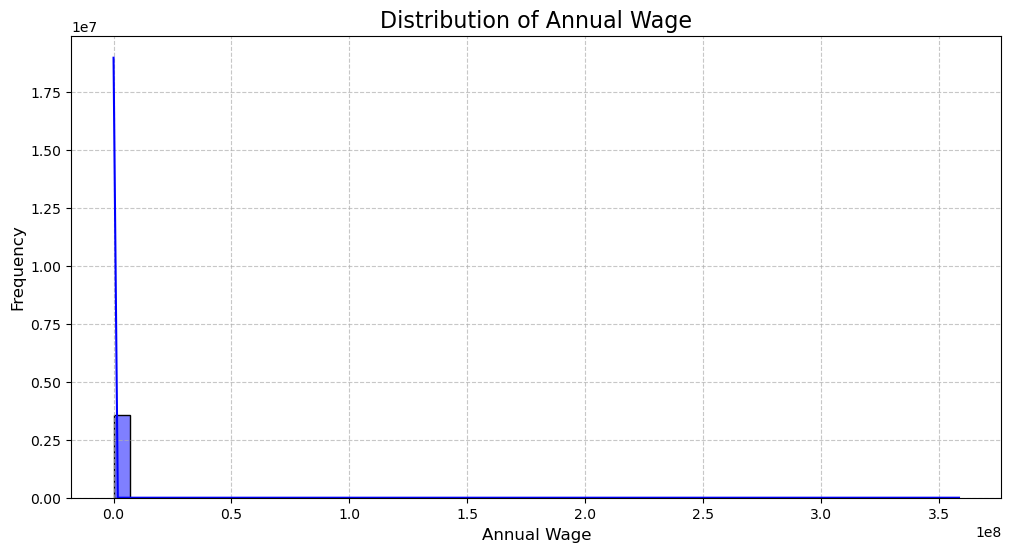

In [78]:
# Plot the distribution of Annual Wage
plt.figure(figsize=(12, 6))
sns.histplot(df['ANNUAL_WAGE'], bins=50, kde=True, color='blue')
plt.title('Distribution of Annual Wage', fontsize=16)
plt.xlabel('Annual Wage', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

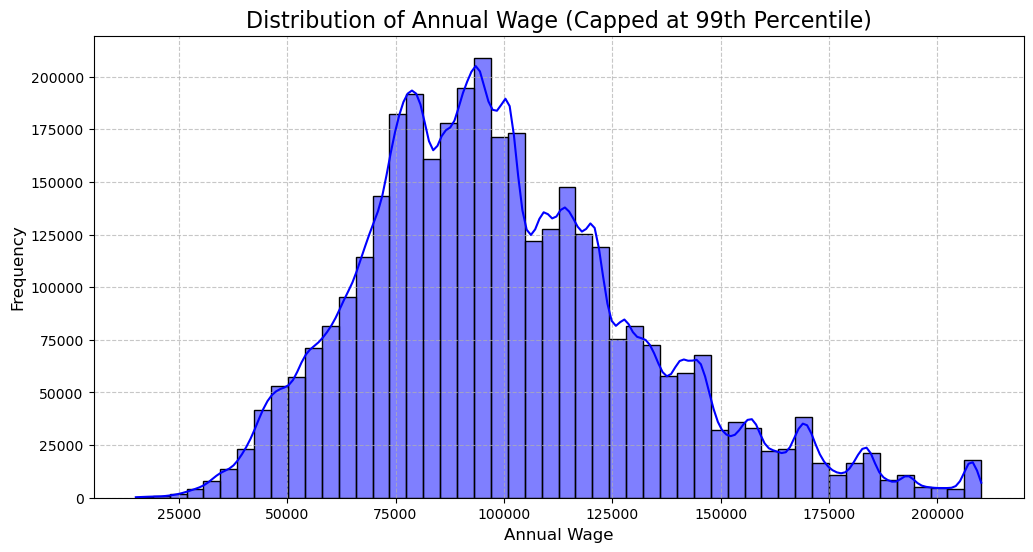

In [79]:
# Cap outliers at the 99th percentile
wage_cap = df['ANNUAL_WAGE'].quantile(0.99)
filtered_df = df[df['ANNUAL_WAGE'] <= wage_cap]

# Plot the distribution of Annual Wage with outliers capped
plt.figure(figsize=(12, 6))
sns.histplot(filtered_df['ANNUAL_WAGE'], bins=50, kde=True, color='blue')
plt.title('Distribution of Annual Wage (Capped at 99th Percentile)', fontsize=16)
plt.xlabel('Annual Wage', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


### 5. Top 10 Occupations by Average Annual Wage

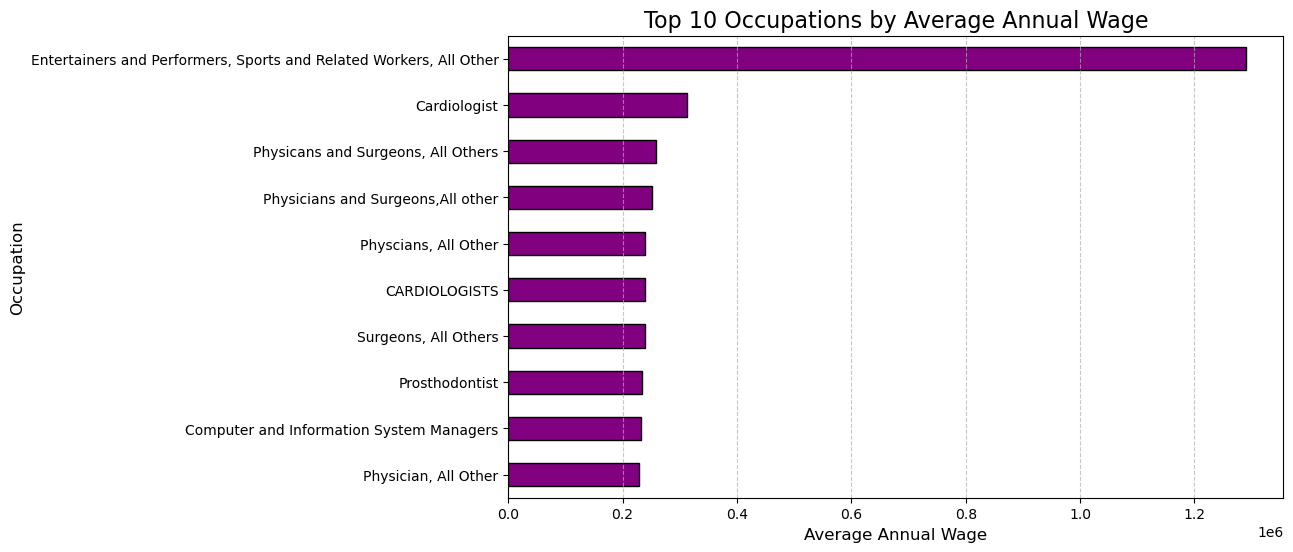

In [80]:
# Analyze average salaries by occupation
avg_salaries = df.groupby('SOC_TITLE')['ANNUAL_WAGE'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
avg_salaries.plot(kind='barh', color='purple', edgecolor='black')
plt.title('Top 10 Occupations by Average Annual Wage', fontsize=16)
plt.xlabel('Average Annual Wage', fontsize=12)
plt.ylabel('Occupation', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### 6. Bottom 10 Occupations by Average Annual Wage

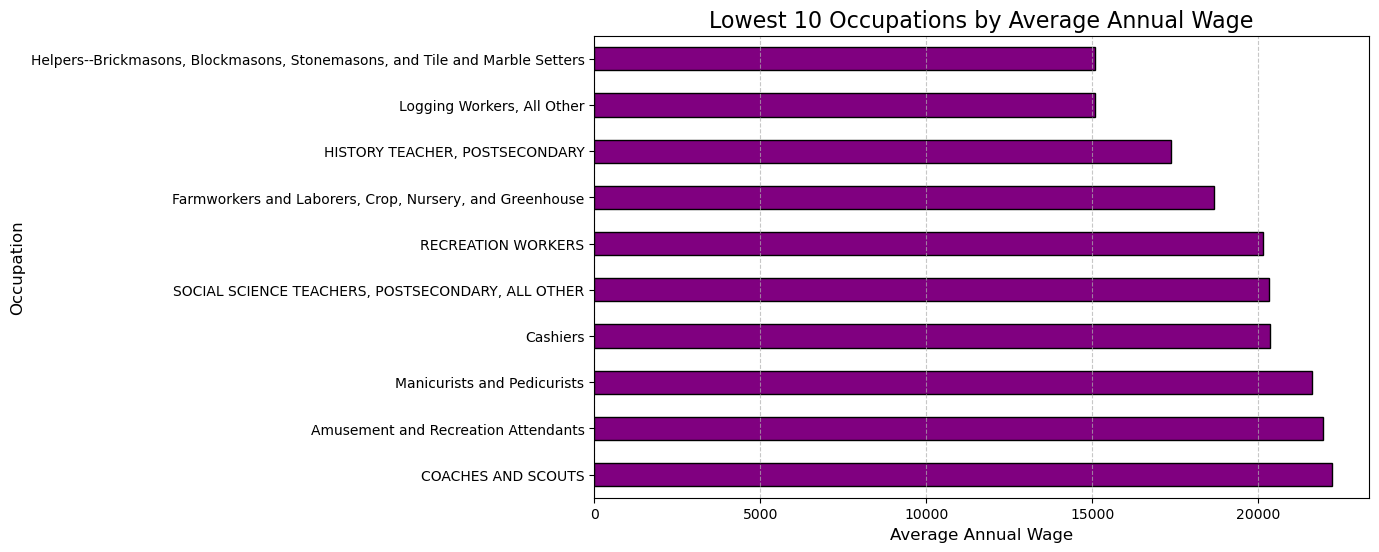

In [81]:
# Analyze average salaries by occupation
avg_salaries_rev = df.groupby('SOC_TITLE')['ANNUAL_WAGE'].mean().sort_values(ascending=True).head(10)

plt.figure(figsize=(10, 6))
avg_salaries_rev.plot(kind='barh', color='purple', edgecolor='black')
plt.title('Lowest 10 Occupations by Average Annual Wage', fontsize=16)
plt.xlabel('Average Annual Wage', fontsize=12)
plt.ylabel('Occupation', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### 7. H1B Case Statuses' Trend by Year

CASE_STATUS
Certified                3292311
Certified - Withdrawn     184634
Withdrawn                  64014
Denied                     21777
Name: count, dtype: int64


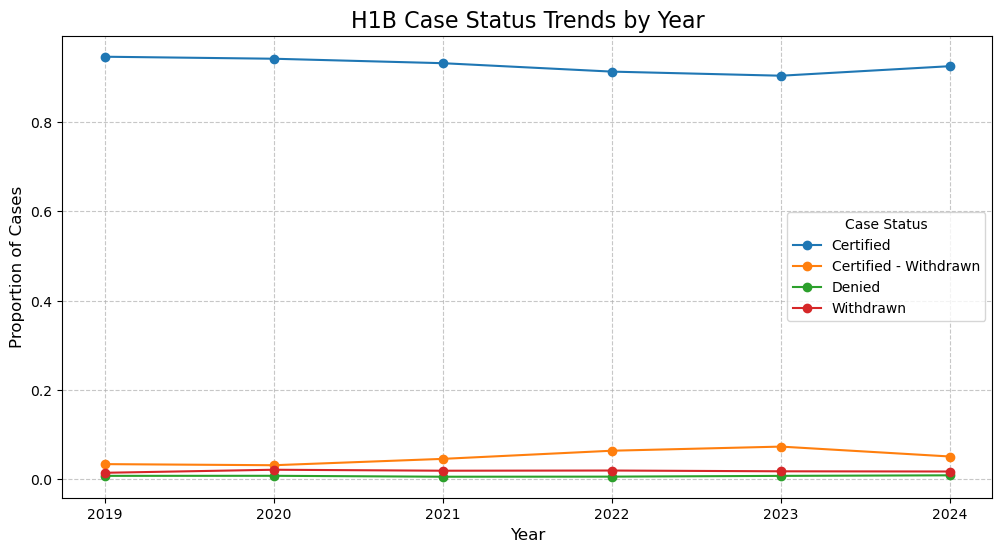

In [82]:
"""
Case Status Insights
Calculate approval rates by year.
"""
yearly_status = df.groupby('YEAR')['CASE_STATUS'].value_counts(normalize=True).unstack().fillna(0)
print(df.CASE_STATUS.value_counts())

#plot
plt.figure(figsize=(12, 6))
for status in yearly_status.columns:
    plt.plot(yearly_status.index, yearly_status[status], marker='o', label=status)

plt.title('H1B Case Status Trends by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Proportion of Cases', fontsize=12)
plt.legend(title='Case Status')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 8. Number H1B Applicants by State

In [83]:
import plotly.express as px

# Example DataFrame
state_counts = df['EMPLOYER_STATE'].value_counts().reset_index()
state_counts.columns = ['State', 'Applicants']

# Use Plotly Express to create a choropleth map
fig = px.choropleth(
    state_counts,
    locations='State',          # Column with state abbreviations
    locationmode='USA-states',  # Specify USA states
    color='Applicants',         # Color by the number of applicants
    color_continuous_scale='Viridis',  # Color scale
    scope='usa',                # Focus on the USA
    title='Number of H1B Applicants by State',
    width=1000,
    height=600
)

# Display the map
fig.show()


In [84]:
CA_count = df['EMPLOYER_STATE'].value_counts().get('CA',0)
print(f"Number of applicants in CA: {CA_count}")

Number of applicants in CA: 734669


### 9. Top 10 Employers for H1B Applications 

In [85]:
# Frequency encoding for EMPLOYER_NAME

frequency_encoding = df['EMPLOYER_NAME'].value_counts(normalize=True)  # Compute frequency
df['EMPLOYER_NAME_FREQUENCY'] = df['EMPLOYER_NAME'].map(frequency_encoding)  # Map to DataFrame

# Get top 10 high-frequency companies
top_10_employers = frequency_encoding.head(10)

# Display the top 10
print("Top 10 Employers by Frequency:")
print(top_10_employers)

Top 10 Employers by Frequency:
EMPLOYER_NAME
COGNIZANT TECHNOLOGY SOLUTIONS US CORP    0.026495
Google LLC                                0.017550
Ernst & Young U.S. LLP                    0.017419
Amazon.com Services LLC                   0.016736
Microsoft Corporation                     0.015522
INFOSYS LIMITED                           0.012091
TATA CONSULTANCY SERVICES LIMITED         0.010956
Apple Inc.                                0.007054
Accenture LLP                             0.006751
Intel Corporation                         0.006360
Name: proportion, dtype: float64


## Finding Correlation Between Variables

#### Preprocessing

In [86]:
#get the processing time from subtracting decision date and start date and case status is certified
#processing the time into usable format

df['BEGIN_DATE'] = pd.to_datetime(df['BEGIN_DATE'])
df['DECISION_DATE'] = pd.to_datetime(df['DECISION_DATE'])
df['RECEIVED_DATE'] = pd.to_datetime(df['RECEIVED_DATE'])


print(df.BEGIN_DATE.value_counts())
print(df.DECISION_DATE.value_counts())
df['Decision_Duration'] = df['BEGIN_DATE'] - df['DECISION_DATE']

df.Decision_Duration

BEGIN_DATE
2024-10-01    118700
2023-10-01    114155
2022-10-01    105181
2020-10-01     89887
2021-10-01     87909
               ...  
2019-01-17         1
2019-06-26         1
2019-01-10         1
2019-01-03         1
2025-03-26         1
Name: count, Length: 2226, dtype: int64
DECISION_DATE
2020-10-15    29251
2020-12-16    13401
2023-10-06    11811
2023-11-17    11389
2020-12-17     9003
              ...  
2021-09-18        1
2022-08-21        1
2023-01-15        1
2021-12-26        1
2020-09-12        1
Name: count, Length: 1795, dtype: int64


0           6 days
1          99 days
2           2 days
3           6 days
4           8 days
            ...   
890363   -245 days
890364     56 days
890365      1 days
890366     92 days
890367    174 days
Name: Decision_Duration, Length: 3562736, dtype: timedelta64[ns]

##### Filtering Dataframe for Variables Possibly Related to Case Staus

In [87]:
#filtering current df
#df1 = df.copy()
#df1 = df[['CASE_STATUS','Decision_Duration','RECEIVED_DATE','SOC_TITLE','FULL_TIME_POSITION','EMPLOYER_NAME','EMPLOYER_CITY','EMPLOYER_STATE','AGENT_REPRESENTING_EMPLOYER','TOTAL_WORKER_POSITIONS','WORKSITE_CITY','WORKSITE_STATE','WORKSITE_WORKERS','WORKSITE_POSTAL_CODE','AGENT_ATTORNEY_CITY','AGENT_ATTORNEY_STATE','ANNUAL_WAGE','H_1B_DEPENDENT','SUPPORT_H1B']]

df1 = df.loc[:, ['CASE_STATUS','Decision_Duration','RECEIVED_DATE','SOC_TITLE','FULL_TIME_POSITION','EMPLOYER_NAME','EMPLOYER_CITY','EMPLOYER_STATE','AGENT_REPRESENTING_EMPLOYER','TOTAL_WORKER_POSITIONS','WORKSITE_CITY','WORKSITE_STATE','WORKSITE_WORKERS','WORKSITE_POSTAL_CODE','AGENT_ATTORNEY_CITY','AGENT_ATTORNEY_STATE','ANNUAL_WAGE','H_1B_DEPENDENT','SUPPORT_H1B']].copy(deep=False)

In [88]:
'''
Preprocessing features
#:'Decision_Duration','TOTAL_WORKER_POSITIONS','ANNUAL_WAGE'
Categorical:'CASE_STATUS','RECEIVED_DATE','SOC_TITLE','FULL_TIME_POSITION','EMPLOYER_NAME','EMPLOYER_CITY','EMPLOYER_STATE','AGENT_REPRESENTING_EMPLOYER','WORKSITE_CITY','WORKSITE_STATE','WORKSITE_WORKERS','WORKSITE_POSTAL_CODE','AGENT_ATTORNEY_CITY','AGENT_ATTORNEY_STATE','H_1B_DEPENDENT','SUPPORT_H1B']
'''

cat_columns = ['CASE_STATUS','RECEIVED_DATE','SOC_TITLE','FULL_TIME_POSITION','EMPLOYER_NAME','EMPLOYER_CITY','EMPLOYER_STATE','AGENT_REPRESENTING_EMPLOYER','WORKSITE_CITY','WORKSITE_STATE','WORKSITE_WORKERS','WORKSITE_POSTAL_CODE','AGENT_ATTORNEY_CITY','AGENT_ATTORNEY_STATE','H_1B_DEPENDENT','SUPPORT_H1B']
for col in cat_columns:
    label_encoder = LabelEncoder()
    df1[col] = label_encoder.fit_transform(df1[col])


In [89]:
df1.head(5)

,CASE_STATUS,Decision_Duration,RECEIVED_DATE,SOC_TITLE,FULL_TIME_POSITION,EMPLOYER_NAME,EMPLOYER_CITY,EMPLOYER_STATE,AGENT_REPRESENTING_EMPLOYER,TOTAL_WORKER_POSITIONS,WORKSITE_CITY,WORKSITE_STATE,WORKSITE_WORKERS,WORKSITE_POSTAL_CODE,AGENT_ATTORNEY_CITY,AGENT_ATTORNEY_STATE,ANNUAL_WAGE,H_1B_DEPENDENT,SUPPORT_H1B
0,0,6 days,223,290,1,89786,5727,38,2,1,13608,37,82,11325,494,16,95118.0,0,4
1,0,99 days,223,1607,1,47200,6247,4,2,1,4637,46,82,10056,1296,9,81120.0,2,2
2,0,2 days,223,1122,1,55202,11671,24,2,1,8925,23,82,12364,2742,25,81120.0,2,2
3,0,6 days,223,1607,1,150953,13067,24,0,1,27225,23,82,12411,3155,58,110240.0,2,2
4,0,8 days,223,290,1,53537,2397,14,0,1,4515,37,82,11597,3155,58,65333.0,2,2


#### Finding Correlation Variables

In [90]:
'''
Spearman correlation can help detect non-linear, categorical, and ordinal data. Good at ranked variables. So maybe it's better in this case when compared to pearson.
'''
#spearman correlation
corr = df1.corr(method='spearman')
corr_matrix = corr['CASE_STATUS']
print(corr_matrix.sort_values(ascending=False))

#pearson correlation
pearson_corr = df1.corr()
pearson_corr_matrix = pearson_corr['CASE_STATUS']
print(pearson_corr_matrix.sort_values(ascending=False))

CASE_STATUS                    1.000000
SUPPORT_H1B                    0.046704
AGENT_ATTORNEY_CITY            0.038245
EMPLOYER_NAME                  0.036510
AGENT_ATTORNEY_STATE           0.025127
SOC_TITLE                     -0.005828
WORKSITE_CITY                 -0.007023
H_1B_DEPENDENT                -0.014863
FULL_TIME_POSITION            -0.015860
WORKSITE_STATE                -0.016563
EMPLOYER_STATE                -0.018469
WORKSITE_POSTAL_CODE          -0.018878
AGENT_REPRESENTING_EMPLOYER   -0.022811
EMPLOYER_CITY                 -0.026106
WORKSITE_WORKERS              -0.030594
TOTAL_WORKER_POSITIONS        -0.039636
ANNUAL_WAGE                   -0.063255
RECEIVED_DATE                 -0.069258
Decision_Duration             -0.219690
Name: CASE_STATUS, dtype: float64
CASE_STATUS                    1.000000
SUPPORT_H1B                    0.029718
EMPLOYER_NAME                  0.028218
AGENT_ATTORNEY_CITY            0.022768
AGENT_ATTORNEY_STATE           0.016246
ANNUAL

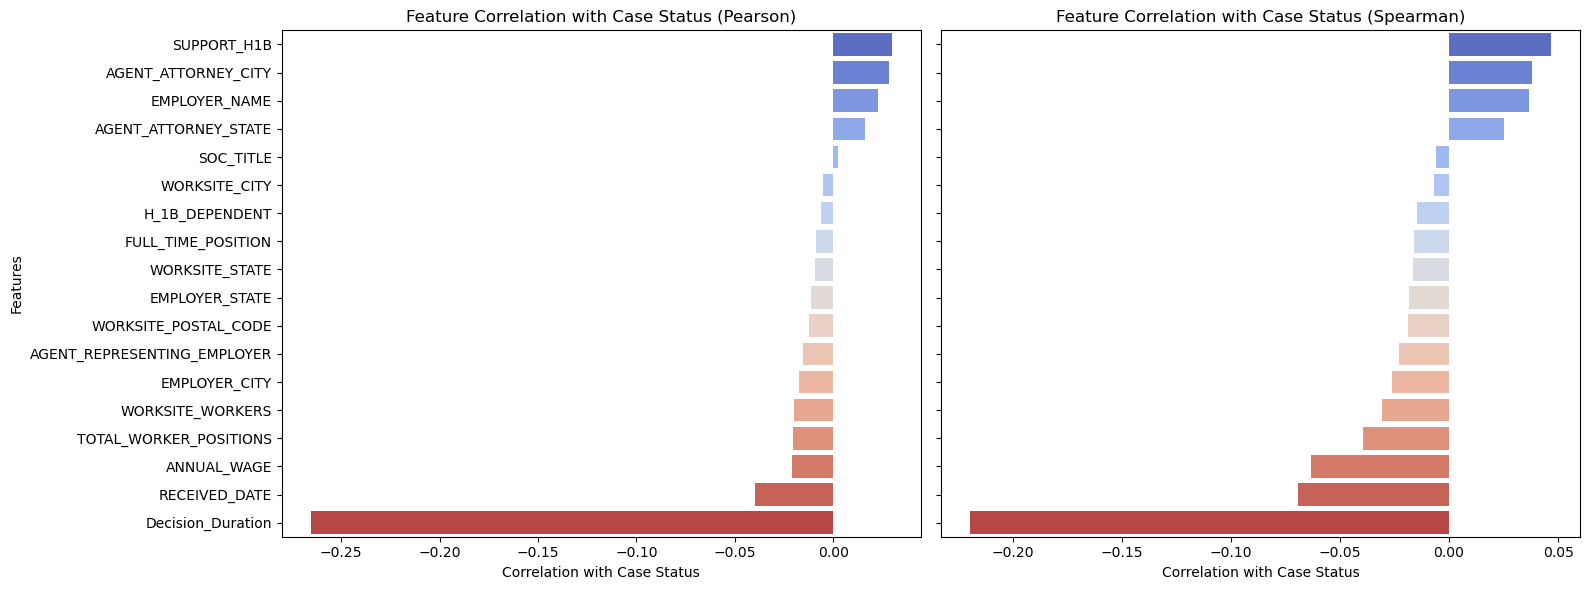

In [91]:
#Collecting Values
target_corr = corr['CASE_STATUS'].drop('CASE_STATUS').sort_values(ascending=False)
target_pearcorr = pearson_corr['CASE_STATUS'].drop('CASE_STATUS').sort_values(ascending=False)

#Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
# Plot Pearson correlation
sns.barplot(x=target_pearcorr.values, y=target_pearcorr.index, palette="coolwarm", ax=axes[0])
axes[0].set_title("Feature Correlation with Case Status (Pearson)")
axes[0].set_xlabel("Correlation with Case Status")
axes[0].set_ylabel("Features")

# Plot Spearman correlation
sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm", ax=axes[1])
axes[1].set_title("Feature Correlation with Case Status (Spearman)")
axes[1].set_xlabel("Correlation with Case Status")
axes[1].set_ylabel("")

# Adjust layout
plt.tight_layout()
plt.show()

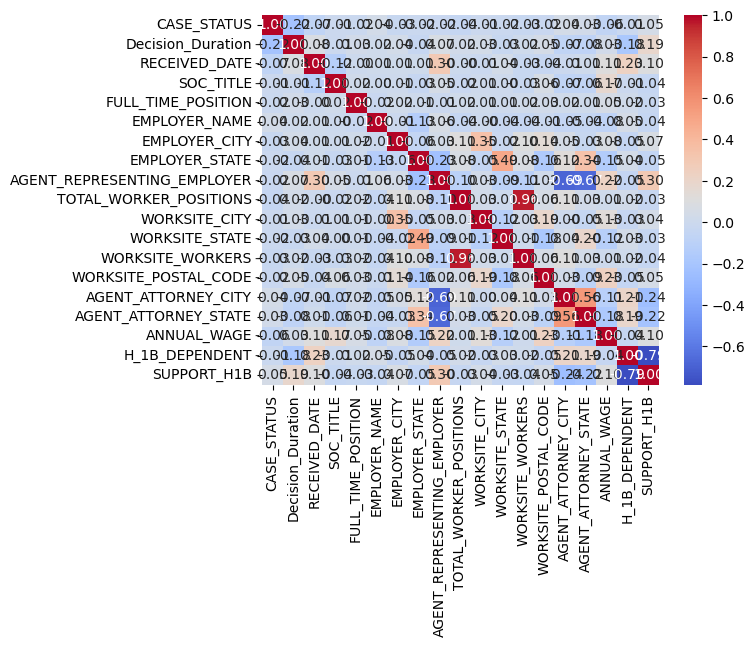

'\n# Plot as a bar chart\nplt.figure(figsize=(10, 6))\nsns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm")\nplt.xlabel("Correlation with Case Status")\nplt.ylabel("Features")\nplt.title("Feature Correlation with Cade Status - Spearman")\nplt.show()\n'

In [92]:
#plot spearman correlation matrix
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

target_corr = corr['CASE_STATUS'].drop('CASE_STATUS').sort_values(ascending=False)

'''
# Plot as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm")
plt.xlabel("Correlation with Case Status")
plt.ylabel("Features")
plt.title("Feature Correlation with Cade Status - Spearman")
plt.show()
'''

#### Mutual Information Classification

In [93]:
from sklearn.feature_selection import mutual_info_classif

df1['Decision_Duration'] = df1['Decision_Duration'].dt.days
X = df1.drop(columns=['CASE_STATUS'])
y = df1['CASE_STATUS'] 

mi_scores = mutual_info_classif(X, y, discrete_features=False)
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information Score': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by="Mutual Information Score", ascending=False)
print(mi_scores_df)

                        Feature  Mutual Information Score
3            FULL_TIME_POSITION                  0.265638
17                  SUPPORT_H1B                  0.231319
7   AGENT_REPRESENTING_EMPLOYER                  0.199127
16               H_1B_DEPENDENT                  0.173473
0             Decision_Duration                  0.149628
8        TOTAL_WORKER_POSITIONS                  0.116238
14         AGENT_ATTORNEY_STATE                  0.103254
13          AGENT_ATTORNEY_CITY                  0.083464
4                 EMPLOYER_NAME                  0.070857
2                     SOC_TITLE                  0.070775
6                EMPLOYER_STATE                  0.055644
10               WORKSITE_STATE                  0.050083
5                 EMPLOYER_CITY                  0.035399
12         WORKSITE_POSTAL_CODE                  0.020915
15                  ANNUAL_WAGE                  0.019632
9                 WORKSITE_CITY                  0.019160
1             

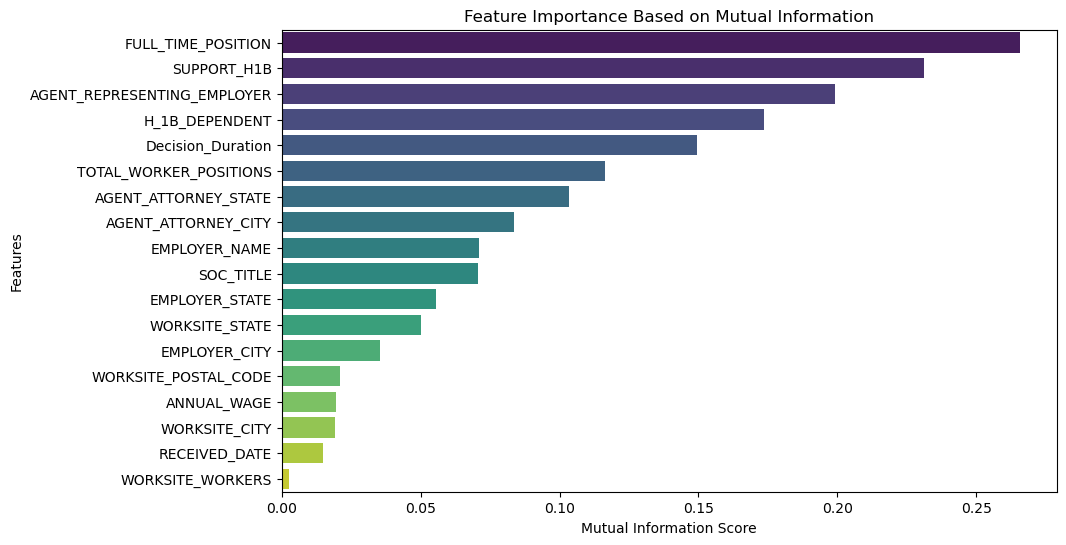

In [94]:
# Plot mutual information scores
plt.figure(figsize=(10, 6))
sns.barplot(x=mi_scores_df['Mutual Information Score'], y=mi_scores_df['Feature'], palette="viridis")
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.title("Feature Importance Based on Mutual Information")
plt.show()